<a href="https://colab.research.google.com/github/kubrayigitbasi/data.kubra/blob/main/akut7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Kütüphanelerin Çağırılması
import numpy as np
import pandas as pd

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Veriyi okumadan önce Sütun isimlerini içerisinde barındıran bir liste oluşturduk, kendi istediğimiz gibi isimlendirdik.
features = ["Days_admission_worse_renal_function" , "Length_of_stay (days)" , "Days_outpatient_renal_function_admission" , 
            "Creatinine_outpatient (mg/dL)" , "Creatinine_worse (mg/dL)" , "Creatinina_admission (mg/dL)" , "eGFR_outpatient" , "eGFR_worse" , "eGFR_admission" , 
            "Weigth (kg)" , "Heigth (cm)" , "BMI" , "SEX" , "Age (years)" , "HTA" , "DM2" , "PVD" , "Previous TIA/CVA" , "COPD" , "Afib/Aflutter" , "IHD,Previous_HF" ,
            "NYHA" , "LVEDV" , "LVESV" , "LVEF" , "LA Volume" , "HR (bpm)" , "SBP (mmHg)" , "NTproBNP_admission" , "Hemoglobina" ,
            "Sodium" , "Potassium" , "ACEI/ARB_previo" , "BBLOCK_previous" , "MRA_previous" , "ACEI/ARB_discharge" , "BBLOCK_discharge" , "MRA_discharge" , "Death" , "Readmission" ,
            " Death_readmission" , "Time_admission_end_followup (years)" , "Time_admission_readmission (years)" , "Inhospital_death"]


# Veriyi okurken names= features diyerek kendi veridiğimiz isimlere göre okuması için komut verdik.
akut = pd.read_csv("https://raw.githubusercontent.com/kubrayigitbasi/data_kubra/main/akut_b%C3%B6brek_data.csv", names= features, header=0)
akut.sample(13)

,Days_admission_worse_renal_function,Length_of_stay (days),Days_outpatient_renal_function_admission,Creatinine_outpatient (mg/dL),Creatinine_worse (mg/dL),Creatinina_admission (mg/dL),eGFR_outpatient,eGFR_worse,eGFR_admission,Weigth (kg),...,MRA_previous,ACEI/ARB_discharge,BBLOCK_discharge,MRA_discharge,Death,Readmission,Death_readmission,Time_admission_end_followup (years),Time_admission_readmission (years),Inhospital_death
0,0,152,0.87,0.73,0.73,68.82,84.26,84.26,78.0,148,...,1,1,1,1,0,1,1,3.471233,0.805479,0
0,3,7,1.55,1.86,1.86,37.03,30.01,30.01,74.0,158,...,0,1,1,0,0,1,1,2.936986,1.616438,0
0,6,51,1.08,1.67,1.67,72.27,43.70,43.70,81.0,165,...,0,0,1,0,0,0,0,3.567123,3.567123,0
2,5,60,1.08,1.15,0.96,68.58,63.79,78.57,83.0,170,...,0,0,0,0,0,0,0,3.663014,3.663014,0
3,4,11,1.14,1.57,1.06,65.36,45.18,71.09,90.0,170,...,0,1,0,0,1,0,1,0.635616,0.635616,0
3,11,7,3.03,2.67,2.67,21.60,25.00,25.00,96.5,168,...,0,0,0,0,0,0,0,4.364384,4.364384,0
5,14,8,1.41,1.47,1.16,50.77,48.39,63.60,77.0,165,...,0,0,1,0,0,0,0,3.010959,3.010959,0
0,2,10,0.81,0.78,0.78,101.65,106.17,106.17,75.0,160,...,0,1,1,1,0,0,0,0.191781,0.191781,0
5,9,26,1.35,3.20,1.08,53.91,19.91,69.75,75.0,165,...,0,-1,1,0,0,0,0,0.884932,0.884932,0
2,6,19,2.40,2.78,2.05,28.84,24.34,34.60,70.7,169,...,0,0,1,0,0,1,1,1.287671,1.227397,0


In [12]:
F1 = np.random.normal(loc=3,scale=10,size=10)
F1

array([ -6.64638635,  -2.67560317, -27.68432485,   1.26203481,
        -2.81951919,  -1.36369298,  19.37432061, -16.96593   ,
       -10.64653012,  -2.35000194])

In [13]:
F1 = np.random.normal(loc=3,scale=0.2,size=15) 
F2 = np.random.normal(loc=5,scale=1,size=15)
F3 = np.random.normal(loc=-2,scale=3,size=15)
F4 = np.random.normal(loc=8,scale=2,size=15)
F5 = np.random.normal(loc=25,scale=3.5,size=15)
F6 = np.random.normal(loc=1,scale=5,size=15)
F7 = np.random.normal(loc=9,scale=1,size=15)

akut = pd.DataFrame({"F1":F1, "F2":F2, "F3":F3, "F4":F4, "F5":F5, "F6":F6, "F7":F7}) 
akut

,F1,F2,F3,F4,F5,F6,F7
0,2.968935,4.353236,3.004783,5.841922,28.765513,2.886379,9.322709
1,3.197487,5.851937,-2.547957,8.094121,28.307939,3.719152,11.093819
2,3.176960,6.041043,-3.780311,9.896316,26.511080,2.145467,9.313799
3,3.228913,4.493120,-4.458143,8.151161,23.028039,0.778535,10.972270
4,3.293890,4.901443,-3.309304,8.154473,30.031392,5.378863,8.734518
5,3.124476,3.669276,-5.591621,7.138704,27.315585,0.274997,9.117456
6,3.149998,5.388980,-0.639482,5.304209,33.064844,-4.498108,7.324995
7,2.742271,4.707617,-0.557282,9.767349,20.898132,7.595836,10.078374
8,3.043957,5.999730,-4.520552,12.332973,32.003365,-0.219174,10.122416
9,2.571552,5.879864,2.613803,10.946598,21.475341,7.348800,9.668061


In [14]:
describtion = akut.describe().T
describtion

,count,mean,std,min,25%,50%,75%,max
F1,15.0,2.998860,0.209453,2.571552,2.926484,2.994971,3.163479,3.293890
F2,15.0,5.184155,0.834558,3.669276,4.519518,4.939158,5.939797,6.483457
F3,15.0,-2.481297,3.598481,-10.114114,-4.489347,-3.260822,-0.412698,3.004783
F4,15.0,8.775187,2.048405,5.304209,7.616412,8.431910,10.099749,12.332973
F5,15.0,26.222121,3.940092,20.898132,22.737424,26.511080,28.536726,33.064844
F6,15.0,3.352874,4.340176,-4.498108,0.526766,2.886379,5.301463,14.205011
F7,15.0,9.368552,1.085369,7.324995,8.878468,9.313799,10.100395,11.093819


In [15]:
describtion["std"]*describtion["std"]

F1     0.043871
F2     0.696487
F3    12.949067
F4     4.195963
F5    15.524327
F6    18.837131
F7     1.178025
Name: std, dtype: float64

In [16]:
# Sklearn kütüphanesinden VarianceThreshold fonksiyonunu tanımladık ve veri setimize uyguladık.
Variance_Threshold_FS = VarianceThreshold(threshold=5)
Variance_Threshold_FS.fit(akut)

VarianceThreshold(threshold=5)

In [17]:
F1 = np.random.normal(loc=4,scale=8,size=7)
F1

array([ 6.94478486,  4.98631952, 10.45751971, -0.47765076, -4.49695238,
       21.21444656,  4.48056462])

In [18]:
F1 = np.random.normal(loc=3,scale=0.2,size=15) 
F2 = np.random.normal(loc=5,scale=1,size=15)
F3 = np.random.normal(loc=-2,scale=3,size=15)
F4 = np.random.normal(loc=8,scale=2,size=15)
F5 = np.random.normal(loc=25,scale=3.5,size=15)
F6 = np.random.normal(loc=1,scale=5,size=15)
F7 = np.random.normal(loc=9,scale=1,size=15)

akut = pd.DataFrame({"F1":F1, "F2":F2, "F3":F3, "F4":F4, "F5":F5, "F6":F6, "F7":F7}) 
akut

,F1,F2,F3,F4,F5,F6,F7
0,3.292050,4.359066,-3.110922,9.628880,23.357368,-9.892391,7.555775
1,3.239279,5.634251,-6.489772,10.432856,30.358941,11.461725,10.286121
2,3.046006,6.147411,0.494144,6.153685,24.637803,1.533450,7.768146
3,2.858509,4.199649,-4.778461,6.362773,21.613324,14.439214,9.406861
4,2.915790,4.529031,-5.336581,4.803822,24.530927,-1.828138,8.958767
5,2.721019,5.226427,-6.646497,9.119488,24.041770,-10.352315,9.344112
6,3.073338,4.672246,-3.111311,5.911443,26.588539,1.622242,10.198438
7,3.422417,3.980249,2.542899,5.240858,26.096565,2.928232,9.737646
8,2.835975,5.379342,-1.123405,6.749403,21.625813,1.026248,9.821377
9,3.270564,3.635495,-6.137477,6.596724,25.115021,6.078620,9.381717


In [19]:
describtion = akut.describe().T
describtion

,count,mean,std,min,25%,50%,75%,max
F1,15.0,3.059195,0.208369,2.721019,2.907481,3.046006,3.254921,3.422417
F2,15.0,4.864019,0.839576,3.635495,4.168535,4.672246,5.444547,6.437360
F3,15.0,-2.216618,3.330637,-6.646497,-5.057521,-3.110922,0.294113,3.684448
F4,15.0,7.752753,2.108951,4.803822,6.258229,7.206678,9.374184,12.237357
F5,15.0,24.635674,2.290713,21.613324,23.174816,24.530927,25.701909,30.358941
F6,15.0,0.660863,7.195304,-10.352315,-2.117551,1.026248,4.503426,14.439214
F7,15.0,9.178725,0.873025,7.555775,8.781522,9.344112,9.779512,10.321316


In [20]:
describtion["std"]*describtion["std"]

F1     0.043418
F2     0.704888
F3    11.093141
F4     4.447675
F5     5.247367
F6    51.772405
F7     0.762172
Name: std, dtype: float64

In [21]:
# Sklearn kütüphanesinden VarianceThreshold fonksiyonunu tanımladık ve veri setimize uyguladık.
Variance_Threshold_FS = VarianceThreshold(threshold=1)
Variance_Threshold_FS.fit(akut)

VarianceThreshold(threshold=1)

In [22]:
# Threshold değerini sağlayan özellikleri sütun bazlı görelim.
Variance_Threshold_FS.get_support()

array([False, False,  True,  True,  True,  True, False])

In [23]:
# Threshold değerini sağlayan özellikleri görüntüleyelim.
akut.columns[Variance_Threshold_FS.get_support()]

Index(['F3', 'F4', 'F5', 'F6'], dtype='object')

In [24]:
# Seçilmeyen özellikler kaç tane?
constant_columns = [column for column in akut.columns
                    if column not in akut.columns[Variance_Threshold_FS.get_support()]]

print(len(constant_columns))

3


In [25]:
# Seçilmeyen özellikler hangileri
for feature in constant_columns:
     print(feature)

F1
F2
F7


In [26]:
# Seçilmeyen özellikleri veri setinden kaldırarak yeni bir veri seti oluşturalım.
Variance_Threshold_akut = akut.drop(constant_columns,axis=1)
Variance_Threshold_akut

,F3,F4,F5,F6
0,-3.110922,9.628880,23.357368,-9.892391
1,-6.489772,10.432856,30.358941,11.461725
2,0.494144,6.153685,24.637803,1.533450
3,-4.778461,6.362773,21.613324,14.439214
4,-5.336581,4.803822,24.530927,-1.828138
5,-6.646497,9.119488,24.041770,-10.352315
6,-3.111311,5.911443,26.588539,1.622242
7,2.542899,5.240858,26.096565,2.928232
8,-1.123405,6.749403,21.625813,1.026248
9,-6.137477,6.596724,25.115021,6.078620


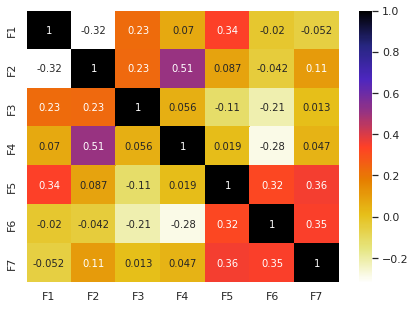

In [27]:
#Using Pearson Correlation
plt.figure(figsize=(7,5))
cor = akut.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [28]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
corr_features = correlation(akut, 0.5)
len(set(corr_features))

1

In [30]:
corr_features

{'F4'}

In [31]:
Correlation_Coefficient_akut = akut.drop(corr_features,axis=1)
Correlation_Coefficient_akut

,F1,F2,F3,F5,F6,F7
0,3.292050,4.359066,-3.110922,23.357368,-9.892391,7.555775
1,3.239279,5.634251,-6.489772,30.358941,11.461725,10.286121
2,3.046006,6.147411,0.494144,24.637803,1.533450,7.768146
3,2.858509,4.199649,-4.778461,21.613324,14.439214,9.406861
4,2.915790,4.529031,-5.336581,24.530927,-1.828138,8.958767
5,2.721019,5.226427,-6.646497,24.041770,-10.352315,9.344112
6,3.073338,4.672246,-3.111311,26.588539,1.622242,10.198438
7,3.422417,3.980249,2.542899,26.096565,2.928232,9.737646
8,2.835975,5.379342,-1.123405,21.625813,1.026248,9.821377
9,3.270564,3.635495,-6.137477,25.115021,6.078620,9.381717


In [32]:
F1 = np.random.normal(loc=50,scale=2,size=10) 
F2 = np.random.normal(loc=5,scale=1,size=10)
F3 = np.random.normal(loc=20,scale=3,size=10)
F4 = np.random.normal(loc=50,scale=2,size=10)
F5 = np.random.normal(loc=25,scale=3.5,size=10)
F6 = np.random.normal(loc=100,scale=5,size=10)
F7 = np.random.normal(loc=9,scale=1,size=10)

df1 = pd.DataFrame({"F1":F1, "F2":F2, "F3":F3, "F4":F4, "F5":F5, "F6":F6, "F7":F7}) 

F1_2 = np.random.normal(loc=80,scale=2,size=10) 
F2_2 = np.random.normal(loc=3,scale=1.5,size=10)
F3_2 = np.random.normal(loc=15,scale=3,size=10)
F4_2 = np.random.normal(loc=40,scale=2,size=10)
F5_2 = np.random.normal(loc=21,scale=3.5,size=10)
F6_2 = np.random.normal(loc=96,scale=5,size=10)
F7_2 = np.random.normal(loc=9,scale=1.2,size=10)

df2 = pd.DataFrame({"F1":F1_2, "F2":F2_2, "F3":F3_2, "F4":F4_2, "F5":F5_2, "F6":F6_2, "F7":F7_2})

akut = pd.concat([df1, df2], ignore_index=True)

Label = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
akut['Label'] = Label

In [33]:
from sklearn.model_selection import train_test_split

X = akut.drop(["Label"], axis=1)
y = akut[["Label"]]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)

In [34]:
X_train

,F1,F2,F3,F4,F5,F6,F7
13,83.899381,4.694152,15.699265,41.397446,16.993972,102.643917,7.371321
6,53.200898,5.074121,26.014507,47.371550,27.426522,97.614817,8.945554
16,78.242552,2.859612,17.287345,40.644782,20.619630,97.792065,8.636290
1,49.918016,5.737655,19.524688,49.533070,18.572222,98.037553,9.692894
9,50.365164,5.423327,21.016505,48.170555,19.491639,94.483738,9.049320
14,79.940418,2.993883,16.838735,39.594914,14.171411,92.414395,10.914746
12,79.830139,1.804225,14.939456,39.536424,19.822348,101.268811,8.695587
5,48.638771,4.825902,19.824198,51.688924,27.280632,110.671726,8.623885
2,49.906355,4.812239,13.812179,48.828631,25.902656,93.573582,8.252662
4,51.882217,6.497572,17.120462,50.686714,20.955853,92.043796,11.361288


In [35]:
X_test

,F1,F2,F3,F4,F5,F6,F7
17,82.679449,5.059286,15.785874,42.886341,13.223951,93.142816,6.804998
19,77.974353,3.539982,11.961791,40.615609,19.502065,100.045478,9.591826
11,82.859053,3.956459,10.935870,42.595703,23.092327,85.354726,9.565287
18,78.262941,2.408909,20.114346,44.080638,22.225288,88.806474,7.856413


In [36]:
y_train

,Label
13,1
6,0
16,1
1,0
9,0
14,1
12,1
5,0
2,0
4,0


In [37]:
y_test

,Label
17,1
19,1
11,1
18,1


In [38]:
from sklearn.feature_selection import chi2

f_p_values = chi2(X_train,y_train)
f_p_values

(array([5.59475051e+01, 4.59488578e+00, 3.71680041e+00, 5.38652115e+00,
        7.18700209e+00, 8.88869260e-02, 3.09115150e-02]),
 array([7.44321300e-14, 3.20674796e-02, 5.38675012e-02, 2.02928889e-02,
        7.34335684e-03, 7.65596996e-01, 8.60437943e-01]))

In [39]:
p_values= pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

F1    7.443213e-14
F2    3.206748e-02
F3    5.386750e-02
F4    2.029289e-02
F5    7.343357e-03
F6    7.655970e-01
F7    8.604379e-01
dtype: float64

In [40]:
p_values.sort_index(ascending=False)

F7    8.604379e-01
F6    7.655970e-01
F5    7.343357e-03
F4    2.029289e-02
F3    5.386750e-02
F2    3.206748e-02
F1    7.443213e-14
dtype: float64

In [41]:
Chi2_akut = akut.drop(akut[["F1"]],axis=1)
Chi2_akut

,F2,F3,F4,F5,F6,F7,Label
0,6.435637,16.565109,50.679735,26.418106,98.825744,7.673757,0
1,5.737655,19.524688,49.533070,18.572222,98.037553,9.692894,0
2,4.812239,13.812179,48.828631,25.902656,93.573582,8.252662,0
3,5.898179,20.025141,49.274524,24.840864,103.319390,9.507203,0
4,6.497572,17.120462,50.686714,20.955853,92.043796,11.361288,0
5,4.825902,19.824198,51.688924,27.280632,110.671726,8.623885,0
6,5.074121,26.014507,47.371550,27.426522,97.614817,8.945554,0
7,4.361692,20.445450,48.597631,19.814214,97.991535,8.079256,0
8,7.218799,19.770141,46.757724,34.715413,106.859884,9.653370,0
9,5.423327,21.016505,48.170555,19.491639,94.483738,9.049320,0
